In [20]:
import pandas 
import matplotlib.pyplot as plt
import numpy as np 


def read_inst():
    dataframe_train=pandas.read_csv('mnist_train.csv')
    dataframe_test=pandas.read_csv('mnist_test.csv')
    
    data_train=dataframe_train.values
    data_test=dataframe_test.values
    
    y_train=data_train[:,:1]
    y_test=data_test[:,:1]
    
    data_train=data_train[:,1:]
    data_test=data_test[:,1:]
    
    return data_train,y_train,data_test,y_test

X_train,y_train,X_test,y_test=read_inst()

In [21]:
def extra_col(mat):
    mat2=np.ones((len(mat),1+len(mat[0])))
    mat2[:,1:]=mat[:,:]
    return mat2

In [22]:
def filtrate(cifra1:int ,cifra2:int ,mat,y):
    aux=np.squeeze(np.asarray(y))
    mat_filtrata=mat[(aux==cifra1)|(aux==cifra2),:]
    y_filtrat=y[np.where((aux==cifra1) | (aux==cifra2))]
    return mat_filtrata,y_filtrat

In [23]:
#def scalare(mat):
  #  y=(mat[:,:]-mat[:,:].min(axis=0))/(mat[:,:].max(axis=0)-mat[:,:].min(axis=0))
  #  return y

In [24]:
#def another(mat):
  #  y=(mat.T-mat.mean())/(mat[:,:].max(axis=0)-mat[:,:].min(axis=0))
  #  return y.T

In [25]:
def worck(mat):
    y=(mat-mat.mean())/mat.mean()
    return y

In [26]:
def model_predictie(x,teta):
    aux=np.dot(x,np.transpose(teta))
    aux=worck(aux)
    return 1/(1+np.exp(-aux))

In [27]:
#def model(x,teta):
 #   aux=np.dot(x,np.transpose(teta))
 #   return 1/(1+np.exp(-aux))

In [28]:
def Kcost(y,x,teta,lam):
    h=model_predictie(x,teta)
    m=y.shape[0]
    I=(y*np.log(h)+(1-y)*(np.log(1-h))).mean()
    II=(np.sum(np.power(teta,2))*lam/(2*x.shape[1]))
    return -I

In [29]:
def gradient(x,y,h):
    return np.dot(x.T,(h-y))

In [30]:
#def gard(x,y,h,lam,teta):
   # return (np.dot(x.T,(h-y))+(lam/y.shape[0])*teta.T)/y.shape[0]

In [31]:
def gradient_descent(x,y):
    teta=np.random.rand(1,x.shape[1])
    #teta=np.zeros([1,x.shape[1]])
    nr_it=50
    lam=0.1
    alfa=0.002
    m=y.shape[0]
    eroare=np.zeros(nr_it)
    for i in range (0,nr_it):
        #grad=gradient(x,y,model_predictie(x,teta))
        grad=gradient(x,y,model_predictie(x,teta))
        #clone=teta.copy()
        #teta=teta-alfa*(grad.T+(lam*clone/m))
        #ec=((alfa*grad.T)*(1/m)+((lam/(2*x.shape[1])))*aux)
        ec=(alfa*grad.T)*(1/m)
        teta=teta-ec
      
        
        eroare[i]=Kcost(y,x,teta.copy(),lam)
    return eroare,nr_it,teta

(12700, 785)


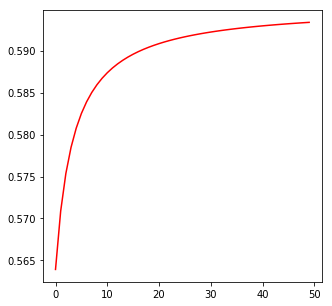

[[0.46916805]
 [0.56100191]
 [0.46219639]
 ...
 [0.58077149]
 [0.45674051]
 [0.37155251]] 0.8071566921445914 0.3244923076559893
y [[1]
 [2]
 [1]
 ...
 [2]
 [2]
 [1]]
[[0.51046279]
 [0.39134025]
 [0.44145598]
 ...
 [0.60539069]
 [0.4895245 ]
 [0.6707901 ]] 0.7675230618127941 0.3330739102370803
y [[2]
 [1]
 [1]
 ...
 [2]
 [1]
 [2]]
[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]
82.41808952468851
1786 2167


In [34]:
def main():
    mat,y=filtrate(1,2,X_train,y_train)
    mat=extra_col(mat)
    print(mat.shape)
    
    eroare,nr_iteratii,t=gradient_descent(mat,y)
    #print('eraore',eroare,eroare.shape)
    plt.figure(figsize=(5,5))
    plt.plot(np.arange(nr_iteratii),eroare,'red')
    plt.show()
    
    h=model_predictie(mat,t)
    print(h,np.max(h),np.min(h))
    print('y',y)
    
    #aux1=h>0.5
    #print(aux1)
    #aux2=y==2
    #contor=0
    #for i in range (0,len(y)):
    #    if (aux1[i]==aux2[i]):
    #        contor+=1
    #print(100*contor/(len(y)))
    
    #print(contor,len(y))
    
    test,y_t=filtrate(1,2,X_test,y_test)
    test=extra_col(test)
    
    h_test=model_predictie(test,t)
    print(h_test,np.max(h_test),np.min(h_test))
    print('y',y_t)
    
    aux1=h_test>0.5
    print(aux1)
    aux2=y_t==2
    contor=0
    for i in range (0,len(y_t)):
        if (aux1[i]==aux2[i]):
            contor+=1
    print(100*contor/(len(y_t)))
    
    print(contor,len(y_t))
    
    
main()